# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [3]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [4]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [5]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [6]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [8]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()
df_sin_quarter

<ipython-input-8-aad5d98914bf>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,교육,독서실,신촌동,169054586,18,1,0
1,2017-1,서비스,교육,스포츠강습,신촌동,795837623,23,1,0
2,2017-1,서비스,교육,예술학원,신촌동,1162571945,28,1,0
3,2017-1,서비스,교육,외국어학원,신촌동,3196308868,24,2,2
4,2017-1,서비스,교육,일반교습학원,신촌동,762815407,9,1,3
...,...,...,...,...,...,...,...,...,...
1339,2022-4,외식,식사류,패스트푸드점,신촌동,3057584360,83,0,4
1340,2022-4,외식,식사류,한식음식점,신촌동,29617724330,435,8,12
1341,2022-4,외식,주류,호프-간이주점,신촌동,7366806532,171,1,6
1342,2022-4,외식,카페/베이커리,제과점,신촌동,1302230221,48,3,2


# 일반의원

In [10]:
# 일반의원만 남기기
sin_hosp = df_sin_quarter[df_sin_quarter.업종명 == '일반의원'].reset_index().drop('index', axis=1)
sin_hosp

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,의료,일반의원,신촌동,10379306341,93,0,1
1,2017-2,서비스,의료,일반의원,신촌동,9630404459,92,1,2
2,2017-3,서비스,의료,일반의원,신촌동,9492884482,90,1,3
3,2017-4,서비스,의료,일반의원,신촌동,8887913251,94,5,1
4,2018-1,서비스,의료,일반의원,신촌동,10172009904,91,0,3
5,2018-2,서비스,의료,일반의원,신촌동,9002824501,90,2,3
6,2018-3,서비스,의료,일반의원,신촌동,9182735301,89,1,2
7,2018-4,서비스,의료,일반의원,신촌동,9379632209,89,0,0
8,2019-1,서비스,의료,일반의원,신촌동,12104099631,86,0,3
9,2019-2,서비스,의료,일반의원,신촌동,11209816532,88,2,0


## 지표 만들기 : 성장성, 시장성, 순점포증감률

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_hosp['성장성'] = sin_hosp['분기당_매출_금액'] / sin_hosp['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_hosp['성장성'][0] = 1

sin_hosp

<ipython-input-11-c19c1fcf8bdf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hosp['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,의료,일반의원,신촌동,10379306341,93,0,1,1.000000
1,2017-2,서비스,의료,일반의원,신촌동,9630404459,92,1,2,0.927847
2,2017-3,서비스,의료,일반의원,신촌동,9492884482,90,1,3,0.985720
3,2017-4,서비스,의료,일반의원,신촌동,8887913251,94,5,1,0.936271
4,2018-1,서비스,의료,일반의원,신촌동,10172009904,91,0,3,1.144477
5,2018-2,서비스,의료,일반의원,신촌동,9002824501,90,2,3,0.885059
6,2018-3,서비스,의료,일반의원,신촌동,9182735301,89,1,2,1.019984
7,2018-4,서비스,의료,일반의원,신촌동,9379632209,89,0,0,1.021442
8,2019-1,서비스,의료,일반의원,신촌동,12104099631,86,0,3,1.290466
9,2019-2,서비스,의료,일반의원,신촌동,11209816532,88,2,0,0.926117


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

sin_hosp['개업률'] = (sin_hosp['개업점포수'] / sin_hosp['총 점포수']) * 100
sin_hosp['폐업률'] = (sin_hosp['폐업점포수'] / sin_hosp['총 점포수']) * 100
sin_hosp['순점포증감률'] = ((sin_hosp['개업점포수'] - sin_hosp['폐업점포수']) / sin_hosp['총 점포수']) * 100

# sin_hosp

In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 한식만 남기기
seo_hosp = df_seo_quarter[df_seo_quarter['업종명'] == '일반의원'].reset_index()

################################################################################################################################################################################################

sin_hosp['시장성'] = (sin_hosp['분기당_매출_금액'] / sin_hosp['총 점포수']) - (seo_hosp['분기당_매출_금액'] / seo_hosp['총 점포수'])

sin_hosp = sin_hosp[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_hosp

<ipython-input-13-81bdb2b4cccf>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일반의원,10379306341,1.000000,-1.075269,-1.031224e+07
1,2017-2,일반의원,9630404459,0.927847,-1.086957,-1.527883e+07
2,2017-3,일반의원,9492884482,0.985720,-2.222222,-2.028841e+07
3,2017-4,일반의원,8887913251,0.936271,4.255319,-3.079050e+07
4,2018-1,일반의원,10172009904,1.144477,-3.296703,-1.755805e+07
5,2018-2,일반의원,9002824501,0.885059,-1.111111,-2.173273e+07
6,2018-3,일반의원,9182735301,1.019984,-1.123596,-1.956954e+07
7,2018-4,일반의원,9379632209,1.021442,0.000000,-4.945759e+07
8,2019-1,일반의원,12104099631,1.290466,-3.488372,1.307672e+07
9,2019-2,일반의원,11209816532,0.926117,2.272727,-3.816054e+06


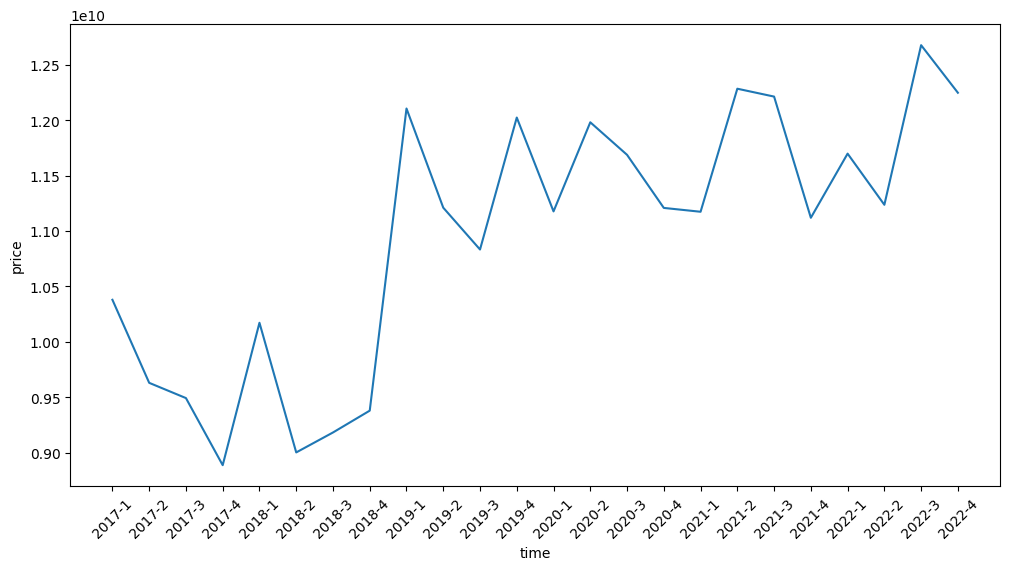

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_hosp['분기'], y=sin_hosp['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_hosp[['성장성', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.031224e+07 -1.075269
1   0.927847 -1.527883e+07 -1.086957
2   0.985720 -2.028841e+07 -2.222222
3   0.936271 -3.079050e+07  4.255319
4   1.144477 -1.755805e+07 -3.296703
5   0.885059 -2.173273e+07 -1.111111
6   1.019984 -1.956954e+07 -1.123596
7   1.021442 -4.945759e+07  0.000000
8   1.290466  1.307672e+07 -3.488372
9   0.926117 -3.816054e+06  2.272727
10  0.966351 -5.696994e+06  0.000000
11  1.109844 -3.456353e+07  0.000000
12  0.929616 -2.204874e+07  0.000000
13  1.071894 -1.871544e+07  0.000000
14  0.975502 -2.214081e+07 -1.136364
15  0.959043 -2.329059e+07  2.222222
16  0.996906 -1.256593e+07 -1.123596
17  1.099308 -1.348794e+07 -1.136364
18  0.994220 -9.582373e+06  0.000000
19  0.910509 -2.998029e+07 -2.352941
20  1.052020 -2.010944e+07  1.162791
21  0.960562 -2.713385e+07  2.272727
22  1.128104 -1.096890e+07 -7.317073
23  0.966153 -3.072108e+07  2.380952
---------------------------------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.59950877 0.61548111 0.        ]
 [0.20003213 0.29961966 0.83803118]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2943
Epoch 1: val_loss improved from inf to 0.59601, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2943 - val_loss: 0.5960
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2837
Epoch 2: val_loss improved from 0.59601 to 0.57806, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2837 - val_loss: 0.5781
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2735
Epoch 3: val_loss improved from 0.57806 to 0.56054, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2735 - val_loss: 0.5605
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2637
Epoch 4: val_loss improved from 0.56054 to 0.54338, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2637 - val_loss: 0.5434
Epoch 5/100
1/1 [=================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 880ms/step
[[0.5293322 ]
 [0.47632343]
 [0.44233957]
 [0.55360246]
 [0.48142728]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.589037,0.529332
2022-1,0.741757,0.476323
2022-2,0.619951,0.442340
2022-3,1.000000,0.553602
2022-4,0.886722,0.481427


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.589037,0.529332,11118769090,1.089265e+10,2.261196e+08
2022-1,0.741757,0.476323,11697166116,1.069189e+10,1.005277e+09
2022-2,0.619951,0.442340,11235848959,1.056318e+10,6.726653e+08
2022-3,1.000000,0.553602,12675207046,1.098457e+10,1.690639e+09
2022-4,0.886722,0.481427,12246191169,1.071122e+10,1.534971e+09


### 결과

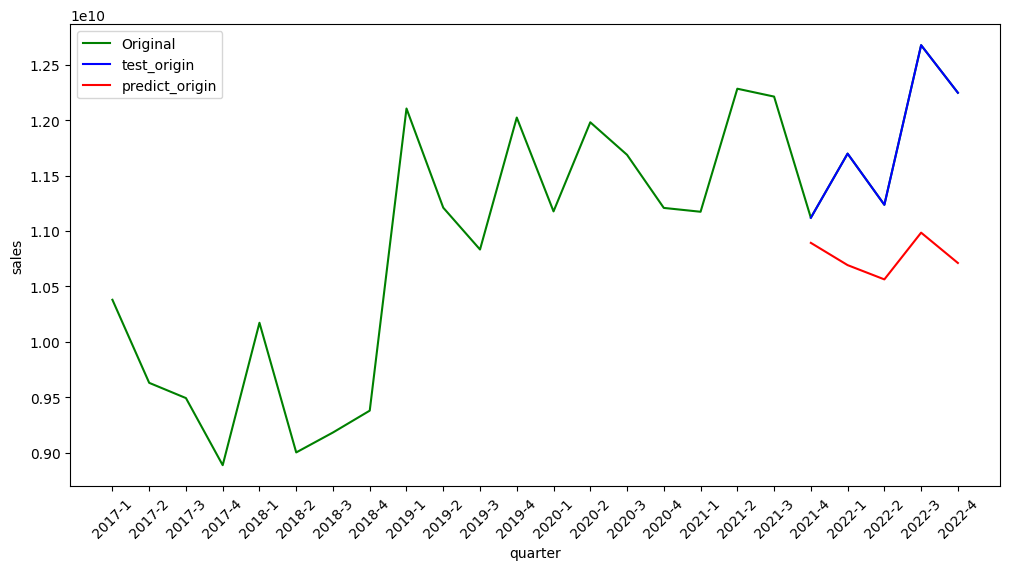

In [27]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     1.025934e+09
std      6.053677e+08
min      2.261196e+08
25%      6.726653e+08
50%      1.005277e+09
75%      1.534971e+09
max      1.690639e+09
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 37ms/step
[[0.43313456]]
--------------------------------------------------------------------------------
예측된 매출  : 10528320512.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      분기당_매출_금액           시장성    순점포증감률
0   10379306341 -1.031224e+07 -1.075269
1    9630404459 -1.527883e+07 -1.086957
2    9492884482 -2.028841e+07 -2.222222
3    8887913251 -3.079050e+07  4.255319
4   10172009904 -1.755805e+07 -3.296703
5    9002824501 -2.173273e+07 -1.111111
6    9182735301 -1.956954e+07 -1.123596
7    9379632209 -4.945759e+07  0.000000
8   12104099631  1.307672e+07 -3.488372
9   11209816532 -3.816054e+06  2.272727
10  10832615063 -5.696994e+06  0.000000
11  12022512978 -3.456353e+07  0.000000
12  11176323737 -2.204874e+07  0.000000
13  11979832875 -1.871544e+07  0.000000
14  11686346009 -2.214081e+07 -1.136364
15  11207704374 -2.329059e+07  2.222222
16  11173022909 -1.256593e+07 -1.123596
17  12282589771 -1.348794e+07 -1.136364
18  12211599922 -9.582373e+06  0.000000
19  11118769090 -2.998029e+07 -2.352941
20  11697166116 -2.010944e+07  1.162791
21  11235848959 -2.713385e+07  2.272727
22  12675207046 -1.096890e+07 -7.317073
23  12246191169 -3.072108e+07  2.380952


In [32]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [33]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [34]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.61548111 0.        ]
 [0.88672231 0.29961966 0.83803118]]


In [35]:
### 학습용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 5로 설정
   (2) TEST_SIZE = 5는 가장 최근 5분기의 데이터로 모델이 매출액을 예측
   (3) 학습은 과거부터 5분기 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [36]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2100
Epoch 1: val_loss improved from inf to 0.11265, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2100 - val_loss: 0.1126
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2014
Epoch 2: val_loss improved from 0.11265 to 0.10456, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2014 - val_loss: 0.1046
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1931
Epoch 3: val_loss improved from 0.10456 to 0.09690, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.1931 - val_loss: 0.0969
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1852
Epoch 4: val_loss improved from 0.09690 to 0.08962, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1852 - val_loss: 0.0896
Epoch 5/100
1/1 [=================

In [38]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.3067201 ]
 [0.29356688]
 [0.27229315]
 [0.31776562]
 [0.28164166]]


In [39]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.062777,0.306720
2022-1,0.411836,0.293567
2022-2,0.186240,0.272293
2022-3,0.599509,0.317766
2022-4,0.200032,0.281642


In [40]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 3].values       # 성장성이 sin_hosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.062777,0.306720,0.910509,1.009405,-0.098896
2022-1,0.411836,0.293567,1.052020,1.004073,0.047947
2022-2,0.186240,0.272293,0.960562,0.995448,-0.034887
2022-3,0.599509,0.317766,1.128104,1.013883,0.114221
2022-4,0.200032,0.281642,0.966153,0.999238,-0.033085


### 결과

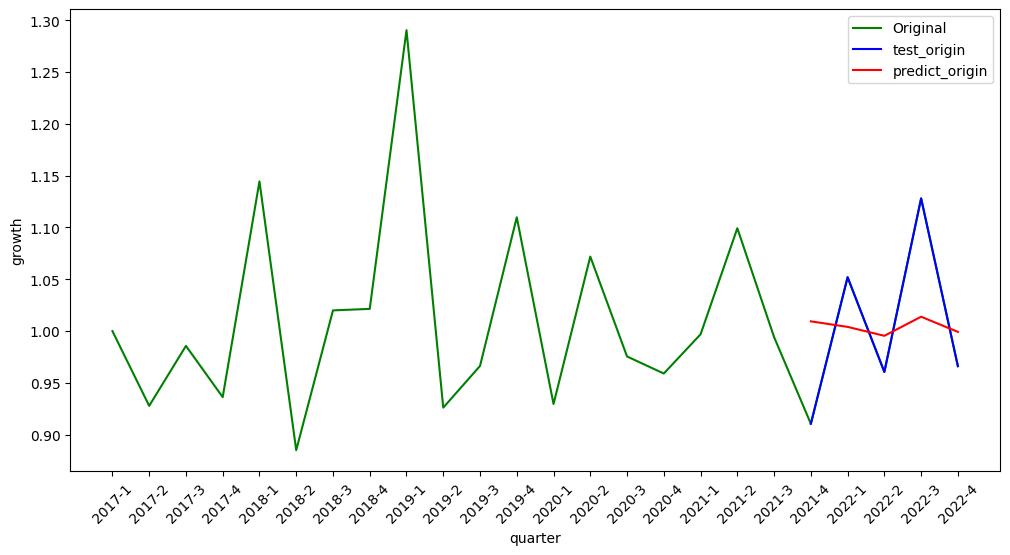

In [41]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [42]:
## error의 요약 통계량
error.describe()

count    5.000000
mean    -0.000940
std      0.082815
min     -0.098896
25%     -0.034887
50%     -0.033085
75%      0.047947
max      0.114221
dtype: float64

In [43]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 42ms/step
[[0.26293164]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9916530847549438 


## 23년 1분기 시장성 예측

In [44]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_hosp[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_hosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액    순점포증감률
0   1.000000  10379306341 -1.075269
1   0.927847   9630404459 -1.086957
2   0.985720   9492884482 -2.222222
3   0.936271   8887913251  4.255319
4   1.144477  10172009904 -3.296703
5   0.885059   9002824501 -1.111111
6   1.019984   9182735301 -1.123596
7   1.021442   9379632209  0.000000
8   1.290466  12104099631 -3.488372
9   0.926117  11209816532  2.272727
10  0.966351  10832615063  0.000000
11  1.109844  12022512978  0.000000
12  0.929616  11176323737  0.000000
13  1.071894  11979832875  0.000000
14  0.975502  11686346009 -1.136364
15  0.959043  11207704374  2.222222
16  0.996906  11173022909 -1.123596
17  1.099308  12282589771 -1.136364
18  0.994220  12211599922  0.000000
19  0.910509  11118769090 -2.352941
20  1.052020  11697166116  1.162791
21  0.960562  11235848959  2.272727
22  1.128104  12675207046 -7.317073
23  0.966153  12246191169  2.380952
--------------------------------------------------------------------------------
             시장성
0 

In [45]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [46]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [47]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.59950877 1.         0.        ]
 [0.20003213 0.88672231 0.83803118]]


In [48]:
### 학습용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 5로 설정
   (2) TEST_SIZE = 5는 가장 최근 5분기의 데이터로 모델이 매출액을 예측
   (3) 학습은 과거부터 5분기 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [49]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3149
Epoch 1: val_loss improved from inf to 0.31549, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3149 - val_loss: 0.3155
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3033
Epoch 2: val_loss improved from 0.31549 to 0.30160, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.3033 - val_loss: 0.3016
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2922
Epoch 3: val_loss improved from 0.30160 to 0.28814, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2922 - val_loss: 0.2881
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2813
Epoch 4: val_loss improved from 0.28814 to 0.27506, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2813 - val_loss: 0.2751
Epoch 5/100
1/1 [=================

In [51]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.5736409 ]
 [0.5117436 ]
 [0.4813975 ]
 [0.5979523 ]
 [0.52739006]]


In [52]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.311466,0.573641
2022-1,0.469313,0.511744
2022-2,0.356984,0.481398
2022-3,0.615481,0.597952
2022-4,0.299620,0.527390


In [53]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 5].values       # 시장성이 sin_hosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.311466,0.573641,-2.998029e+07,-13585354.0,-1.639494e+07
2022-1,0.469313,0.511744,-2.010944e+07,-17456058.0,-2.653379e+06
2022-2,0.356984,0.481398,-2.713385e+07,-19353730.0,-7.780124e+06
2022-3,0.615481,0.597952,-1.096890e+07,-12065056.0,1.096152e+06
2022-4,0.299620,0.527390,-3.072108e+07,-16477617.0,-1.424347e+07


### 결과

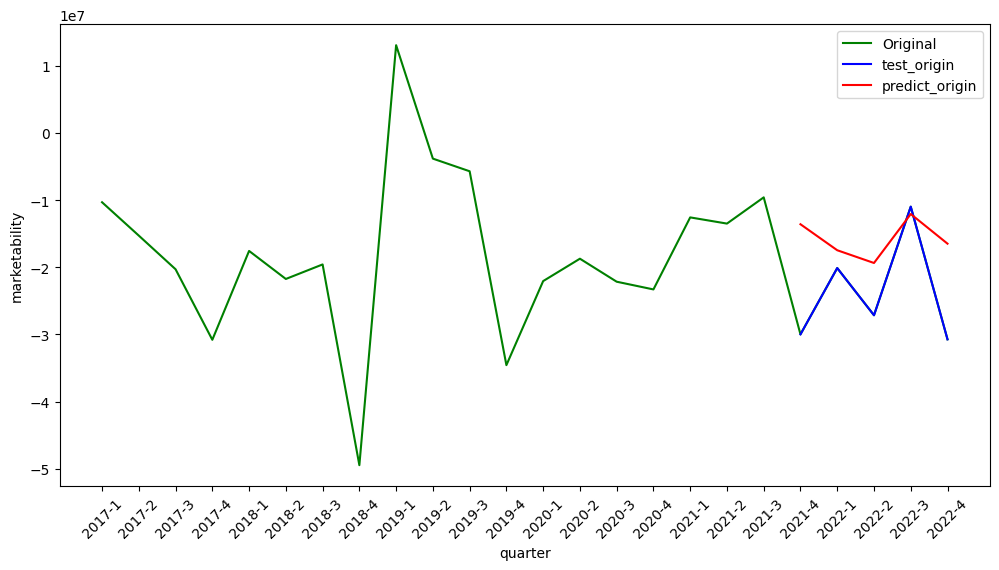

In [54]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [55]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -7.995151e+06
std      7.430182e+06
min     -1.639494e+07
25%     -1.424347e+07
50%     -7.780124e+06
75%     -2.653379e+06
max      1.096152e+06
dtype: float64

In [56]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 42ms/step
[[0.49297258]]
--------------------------------------------------------------------------------
예측된 시장성  : -18629892.0 


## 23년 1분기 순점포증감률 예측

In [57]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 시장성 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_hosp[['성장성', '분기당_매출_금액', '시장성']]
y = sin_hosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액           시장성
0   1.000000  10379306341 -1.031224e+07
1   0.927847   9630404459 -1.527883e+07
2   0.985720   9492884482 -2.028841e+07
3   0.936271   8887913251 -3.079050e+07
4   1.144477  10172009904 -1.755805e+07
5   0.885059   9002824501 -2.173273e+07
6   1.019984   9182735301 -1.956954e+07
7   1.021442   9379632209 -4.945759e+07
8   1.290466  12104099631  1.307672e+07
9   0.926117  11209816532 -3.816054e+06
10  0.966351  10832615063 -5.696994e+06
11  1.109844  12022512978 -3.456353e+07
12  0.929616  11176323737 -2.204874e+07
13  1.071894  11979832875 -1.871544e+07
14  0.975502  11686346009 -2.214081e+07
15  0.959043  11207704374 -2.329059e+07
16  0.996906  11173022909 -1.256593e+07
17  1.099308  12282589771 -1.348794e+07
18  0.994220  12211599922 -9.582373e+06
19  0.910509  11118769090 -2.998029e+07
20  1.052020  11697166116 -2.010944e+07
21  0.960562  11235848959 -2.713385e+07
22  1.128104  12675207046 -1.096890e+07
23  0.966153  12246191169 -3.072108e+07


In [58]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [59]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [60]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.59950877 1.         0.61548111]
 [0.20003213 0.88672231 0.29961966]]


In [61]:
### 학습용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 5로 설정
   (2) TEST_SIZE = 5는 가장 최근 5분기의 데이터로 모델이 매출액을 예측
   (3) 학습은 과거부터 5분기 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [62]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4173
Epoch 1: val_loss improved from inf to 0.41634, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4173 - val_loss: 0.4163
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4039
Epoch 2: val_loss improved from 0.41634 to 0.40129, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.4039 - val_loss: 0.4013
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3908
Epoch 3: val_loss improved from 0.40129 to 0.38668, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.3908 - val_loss: 0.3867
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3781
Epoch 4: val_loss improved from 0.38668 to 0.37244, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.3781 - val_loss: 0.3724
Epoch 5/100
1/1 [=================

In [64]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 854ms/step
[[0.7369874 ]
 [0.63504905]
 [0.53761184]
 [0.61196995]
 [0.6193339 ]]


In [65]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.428963,0.736987
2022-1,0.732767,0.635049
2022-2,0.828679,0.537612
2022-3,0.000000,0.611970
2022-4,0.838031,0.619334


In [66]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.428963,0.736987,-2.352941,1.211634,-3.564575
2022-1,0.732767,0.635049,1.162791,0.031964,1.130827
2022-2,0.828679,0.537612,2.272727,-1.095618,3.368345
2022-3,0.000000,0.611970,-7.317073,-0.235117,-7.081956
2022-4,0.838031,0.619334,2.380952,-0.149898,2.530850


### 결과

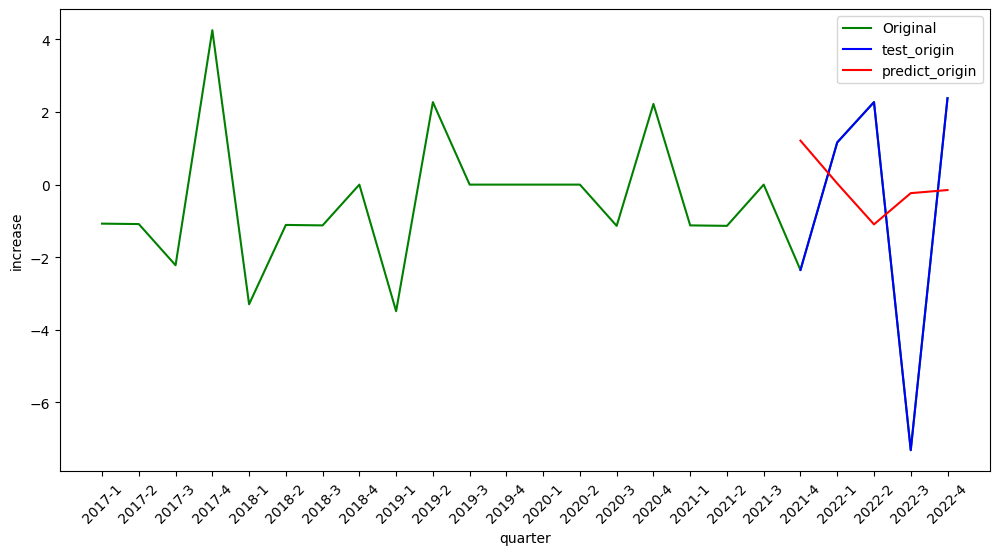

In [67]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [68]:
### error의 요약 통계량
error.describe()

count    5.000000
mean    -0.723302
std      4.451803
min     -7.081956
25%     -3.564575
50%      1.130827
75%      2.530850
max      3.368345
dtype: float64

In [69]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.7195985]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.0104026794433594 


## 원본 데이터에 예측값 추가하기

In [70]:
print(sales)
print(growth)
print(marketability)
print(increase)

10528321000.0
0.9916531
-18629892.0
1.0104027


In [71]:
sin_hosp.loc[24] = ['2023-1', '일반의원', sales, growth, increase, marketability]

<ipython-input-71-5c896c405998>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hosp.loc[24] = ['2023-1', '일반의원', sales, growth, increase, marketability]


In [72]:
sin_hosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일반의원,1.037931e+10,1.000000,-1.075269,-1.031224e+07
1,2017-2,일반의원,9.630404e+09,0.927847,-1.086957,-1.527883e+07
2,2017-3,일반의원,9.492884e+09,0.985720,-2.222222,-2.028841e+07
3,2017-4,일반의원,8.887913e+09,0.936271,4.255319,-3.079050e+07
4,2018-1,일반의원,1.017201e+10,1.144477,-3.296703,-1.755805e+07
5,2018-2,일반의원,9.002825e+09,0.885059,-1.111111,-2.173273e+07
6,2018-3,일반의원,9.182735e+09,1.019984,-1.123596,-1.956954e+07
7,2018-4,일반의원,9.379632e+09,1.021442,0.000000,-4.945759e+07
8,2019-1,일반의원,1.210410e+10,1.290466,-3.488372,1.307672e+07
9,2019-2,일반의원,1.120982e+10,0.926117,2.272727,-3.816054e+06


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [73]:
################ 매출 ####################

# 총 매출액을 예측하기 위한 지표로는 성장성, 시장성, 순점포증감률 선정.

### X / y 데이터 생성
X = sin_hosp[['성장성', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.031224e+07 -1.075269
1   0.927847 -1.527883e+07 -1.086957
2   0.985720 -2.028841e+07 -2.222222
3   0.936271 -3.079050e+07  4.255319
4   1.144477 -1.755805e+07 -3.296703
5   0.885059 -2.173273e+07 -1.111111
6   1.019984 -1.956954e+07 -1.123596
7   1.021442 -4.945759e+07  0.000000
8   1.290466  1.307672e+07 -3.488372
9   0.926117 -3.816054e+06  2.272727
10  0.966351 -5.696994e+06  0.000000
11  1.109844 -3.456353e+07  0.000000
12  0.929616 -2.204874e+07  0.000000
13  1.071894 -1.871544e+07  0.000000
14  0.975502 -2.214081e+07 -1.136364
15  0.959043 -2.329059e+07  2.222222
16  0.996906 -1.256593e+07 -1.123596
17  1.099308 -1.348794e+07 -1.136364
18  0.994220 -9.582373e+06  0.000000
19  0.910509 -2.998029e+07 -2.352941
20  1.052020 -2.010944e+07  1.162791
21  0.960562 -2.713385e+07  2.272727
22  1.128104 -1.096890e+07 -7.317073
23  0.966153 -3.072108e+07  2.380952
24  0.991653 -1.862989e+07  1.010403
--------------------------------------

In [74]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [75]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.20003213 0.29961966 0.83803118]
 [0.26293161 0.49297257 0.71959847]]


In [76]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [77]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3168
Epoch 1: val_loss improved from inf to 0.55651, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3168 - val_loss: 0.5565
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3056
Epoch 2: val_loss improved from 0.55651 to 0.53903, saving model to stock_model.h5
1/1 [==============================] - 0s 141ms/step - loss: 0.3056 - val_loss: 0.5390
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2949
Epoch 3: val_loss improved from 0.53903 to 0.52197, saving model to stock_model.h5
1/1 [==============================] - 0s 138ms/step - loss: 0.2949 - val_loss: 0.5220
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2845
Epoch 4: val_loss improved from 0.52197 to 0.50528, saving model to stock_model.h5
1/1 [==============================] - 0s 119ms/step - loss: 0.2845 - val_loss: 0.5053
Epoch 5/100
1/1 [==============

In [79]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 836ms/step
[[0.50521654]
 [0.4678292 ]
 [0.5857964 ]
 [0.50998384]
 [0.4548922 ]]


In [80]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.741757,0.505217
2022-2,0.619951,0.467829
2022-3,1.000000,0.585796
2022-4,0.886722,0.509984
2023-1,0.433134,0.454892


In [81]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.741757,0.505217,1.169717e+10,1.080132e+10,8.958493e+08
2022-2,0.619951,0.467829,1.123585e+10,1.065972e+10,5.761288e+08
2022-3,1.000000,0.585796,1.267521e+10,1.110650e+10,1.568712e+09
2022-4,0.886722,0.509984,1.224619e+10,1.081937e+10,1.426820e+09
2023-1,0.433134,0.454892,1.052832e+10,1.061072e+10,-8.240230e+07


In [82]:
df_test = df_test.reset_index()

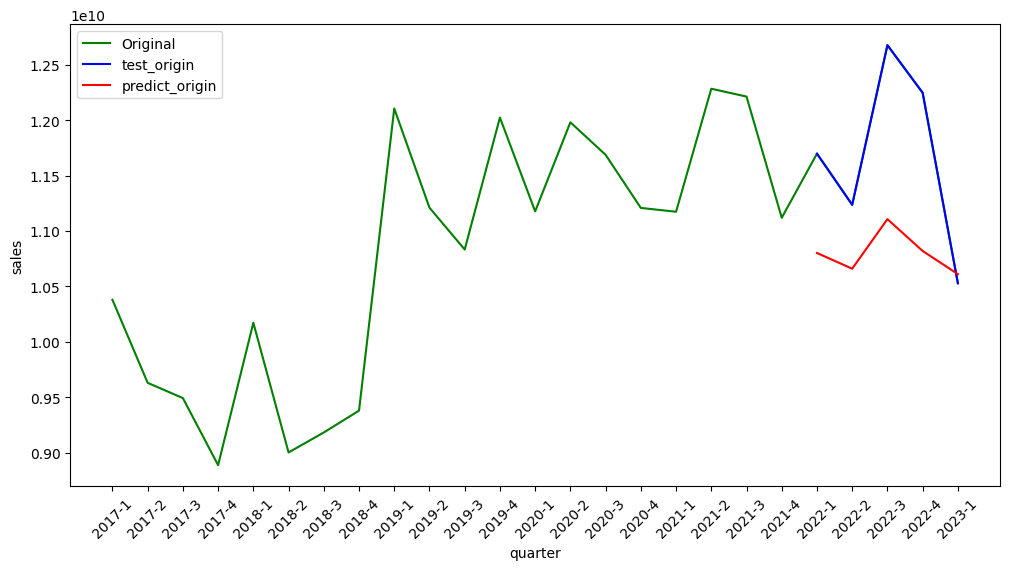

In [83]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [84]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     8.770215e+08
std      6.693464e+08
min     -8.240230e+07
25%      5.761288e+08
50%      8.958493e+08
75%      1.426820e+09
max      1.568712e+09
dtype: float64

In [85]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 27ms/step
[[0.5665949]]
--------------------------------------------------------------------------------
예측된 매출  : 11033774080.0 


### 성장성

In [86]:
### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.037931e+10 -1.031224e+07 -1.075269
1   9.630404e+09 -1.527883e+07 -1.086957
2   9.492884e+09 -2.028841e+07 -2.222222
3   8.887913e+09 -3.079050e+07  4.255319
4   1.017201e+10 -1.755805e+07 -3.296703
5   9.002825e+09 -2.173273e+07 -1.111111
6   9.182735e+09 -1.956954e+07 -1.123596
7   9.379632e+09 -4.945759e+07  0.000000
8   1.210410e+10  1.307672e+07 -3.488372
9   1.120982e+10 -3.816054e+06  2.272727
10  1.083262e+10 -5.696994e+06  0.000000
11  1.202251e+10 -3.456353e+07  0.000000
12  1.117632e+10 -2.204874e+07  0.000000
13  1.197983e+10 -1.871544e+07  0.000000
14  1.168635e+10 -2.214081e+07 -1.136364
15  1.120770e+10 -2.329059e+07  2.222222
16  1.117302e+10 -1.256593e+07 -1.123596
17  1.228259e+10 -1.348794e+07 -1.136364
18  1.221160e+10 -9.582373e+06  0.000000
19  1.111877e+10 -2.998029e+07 -2.352941
20  1.169717e+10 -2.010944e+07  1.162791
21  1.123585e+10 -2.713385e+07  2.272727
22  1.267521e+10 -1.096890e+07 -7.317073
23  1.224619e+10

In [87]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [88]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.88672231 0.29961966 0.83803118]
 [0.43313441 0.49297257 0.71959847]]


In [89]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [90]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1987
Epoch 1: val_loss improved from inf to 0.10258, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1987 - val_loss: 0.1026
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1903
Epoch 2: val_loss improved from 0.10258 to 0.09528, saving model to stock_model.h5
1/1 [==============================] - 0s 134ms/step - loss: 0.1903 - val_loss: 0.0953
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1822
Epoch 3: val_loss improved from 0.09528 to 0.08840, saving model to stock_model.h5
1/1 [==============================] - 0s 156ms/step - loss: 0.1822 - val_loss: 0.0884
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1745
Epoch 4: val_loss improved from 0.08840 to 0.08192, saving model to stock_model.h5
1/1 [==============================] - 0s 118ms/step - loss: 0.1745 - val_loss: 0.0819
Epoch 5/100
1/1 [==============

In [92]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 831ms/step
[[0.2548527 ]
 [0.23743254]
 [0.276126  ]
 [0.2446739 ]
 [0.22948185]]


In [93]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.411836,0.254853
2022-2,0.186240,0.237433
2022-3,0.599509,0.276126
2022-4,0.200032,0.244674
2023-1,0.262932,0.229482


In [94]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 3].values       # 성장성이 sin_hosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.411836,0.254853,1.052020,0.988378,0.063642
2022-2,0.186240,0.237433,0.960562,0.981316,-0.020754
2022-3,0.599509,0.276126,1.128104,0.997002,0.131102
2022-4,0.200032,0.244674,0.966153,0.984251,-0.018098
2023-1,0.262932,0.229482,0.991653,0.978092,0.013561


In [95]:
df_test = df_test.reset_index()

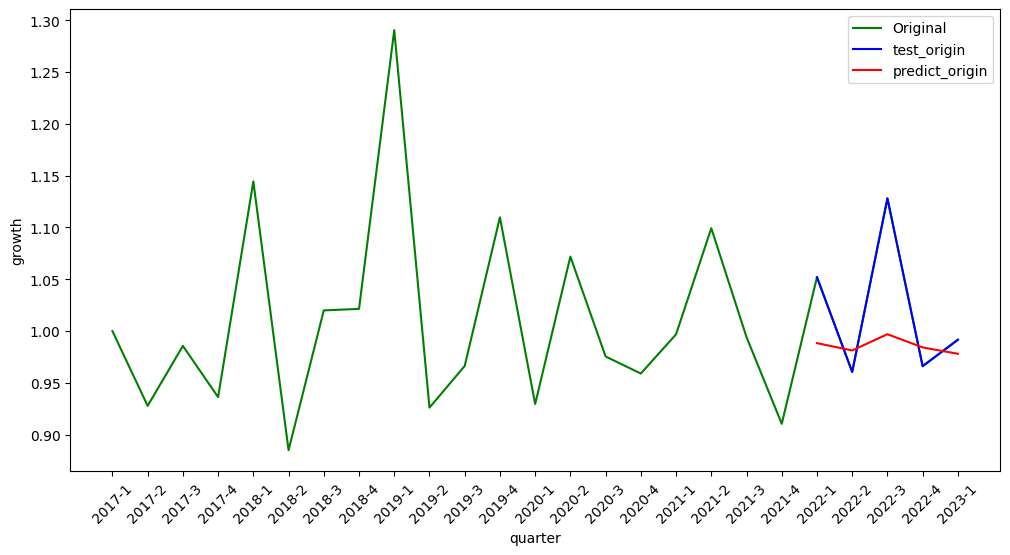

In [96]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [97]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.033891
std      0.064104
min     -0.020754
25%     -0.018098
50%      0.013561
75%      0.063642
max      0.131102
dtype: float64

In [98]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 31ms/step
[[0.27813172]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9978153109550476 


### 시장성

In [99]:
### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_hosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.037931e+10  1.000000 -1.075269
1   9.630404e+09  0.927847 -1.086957
2   9.492884e+09  0.985720 -2.222222
3   8.887913e+09  0.936271  4.255319
4   1.017201e+10  1.144477 -3.296703
5   9.002825e+09  0.885059 -1.111111
6   9.182735e+09  1.019984 -1.123596
7   9.379632e+09  1.021442  0.000000
8   1.210410e+10  1.290466 -3.488372
9   1.120982e+10  0.926117  2.272727
10  1.083262e+10  0.966351  0.000000
11  1.202251e+10  1.109844  0.000000
12  1.117632e+10  0.929616  0.000000
13  1.197983e+10  1.071894  0.000000
14  1.168635e+10  0.975502 -1.136364
15  1.120770e+10  0.959043  2.222222
16  1.117302e+10  0.996906 -1.123596
17  1.228259e+10  1.099308 -1.136364
18  1.221160e+10  0.994220  0.000000
19  1.111877e+10  0.910509 -2.352941
20  1.169717e+10  1.052020  1.162791
21  1.123585e+10  0.960562  2.272727
22  1.267521e+10  1.128104 -7.317073
23  1.224619e+10  0.966153  2.380952
24  1.052832e+10  0.991653  1.010403
--------------------------------------

In [100]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [101]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.88672231 0.20003213 0.83803118]
 [0.43313441 0.26293161 0.71959847]]


In [102]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [103]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3070
Epoch 1: val_loss improved from inf to 0.28266, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.3070 - val_loss: 0.2827
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2955
Epoch 2: val_loss improved from 0.28266 to 0.26983, saving model to stock_model.h5
1/1 [==============================] - 0s 135ms/step - loss: 0.2955 - val_loss: 0.2698
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2844
Epoch 3: val_loss improved from 0.26983 to 0.25740, saving model to stock_model.h5
1/1 [==============================] - 0s 121ms/step - loss: 0.2844 - val_loss: 0.2574
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2736
Epoch 4: val_loss improved from 0.25740 to 0.24533, saving model to stock_model.h5
1/1 [==============================] - 0s 127ms/step - loss: 0.2736 - val_loss: 0.2453
Epoch 5/100
1/1 [==============

In [105]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 888ms/step
[[0.48980346]
 [0.4580987 ]
 [0.5555913 ]
 [0.49465096]
 [0.46575856]]


In [106]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.469313,0.489803
2022-2,0.356984,0.458099
2022-3,0.615481,0.555591
2022-4,0.299620,0.494651
2023-1,0.492973,0.465759


In [107]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 5].values       # 시장성이 sin_hosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.469313,0.489803,-2.010944e+07,-18828070.0,-1.281367e+06
2022-2,0.356984,0.458099,-2.713385e+07,-20810704.0,-6.323150e+06
2022-3,0.615481,0.555591,-1.096890e+07,-14714073.0,3.745169e+06
2022-4,0.299620,0.494651,-3.072108e+07,-18524934.0,-1.219615e+07
2023-1,0.492973,0.465759,-1.862989e+07,-20331702.0,1.701810e+06


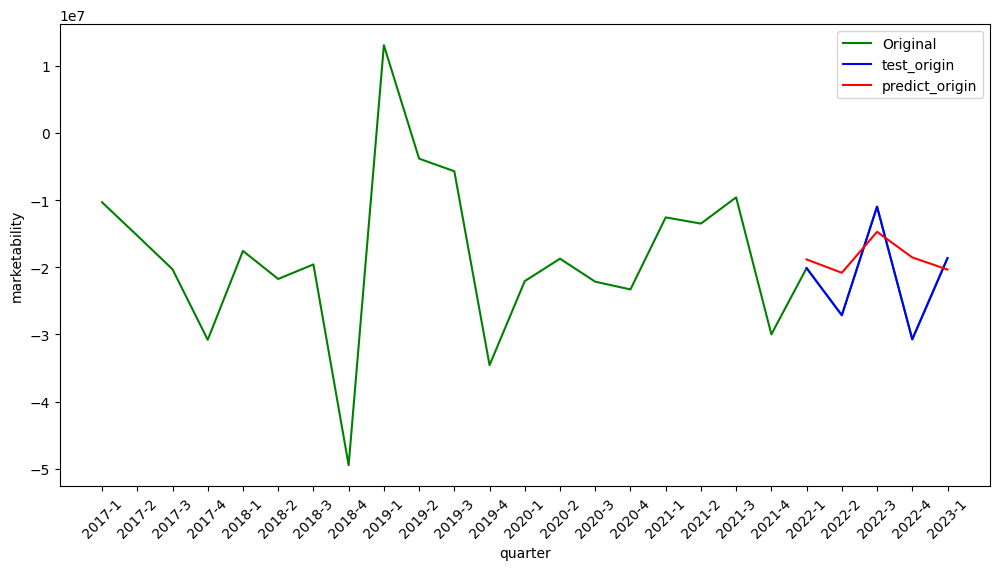

In [108]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [109]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -2.870738e+06
std      6.443737e+06
min     -1.219615e+07
25%     -6.323150e+06
50%     -1.281367e+06
75%      1.701810e+06
max      3.745169e+06
dtype: float64

In [110]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 28ms/step
[[0.5564721]]
--------------------------------------------------------------------------------
예측된 시장성  : -14658991.0 


### 순점포증감률

In [111]:
### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '성장성', '시장성']]
y = sin_hosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.037931e+10  1.000000 -1.031224e+07
1   9.630404e+09  0.927847 -1.527883e+07
2   9.492884e+09  0.985720 -2.028841e+07
3   8.887913e+09  0.936271 -3.079050e+07
4   1.017201e+10  1.144477 -1.755805e+07
5   9.002825e+09  0.885059 -2.173273e+07
6   9.182735e+09  1.019984 -1.956954e+07
7   9.379632e+09  1.021442 -4.945759e+07
8   1.210410e+10  1.290466  1.307672e+07
9   1.120982e+10  0.926117 -3.816054e+06
10  1.083262e+10  0.966351 -5.696994e+06
11  1.202251e+10  1.109844 -3.456353e+07
12  1.117632e+10  0.929616 -2.204874e+07
13  1.197983e+10  1.071894 -1.871544e+07
14  1.168635e+10  0.975502 -2.214081e+07
15  1.120770e+10  0.959043 -2.329059e+07
16  1.117302e+10  0.996906 -1.256593e+07
17  1.228259e+10  1.099308 -1.348794e+07
18  1.221160e+10  0.994220 -9.582373e+06
19  1.111877e+10  0.910509 -2.998029e+07
20  1.169717e+10  1.052020 -2.010944e+07
21  1.123585e+10  0.960562 -2.713385e+07
22  1.267521e+10  1.128104 -1.096890e+07
23  1.224619e+10

In [112]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [113]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.88672231 0.20003213 0.29961966]
 [0.43313441 0.26293161 0.49297257]]


In [114]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [115]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4072
Epoch 1: val_loss improved from inf to 0.38032, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4072 - val_loss: 0.3803
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3939
Epoch 2: val_loss improved from 0.38032 to 0.36597, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.3939 - val_loss: 0.3660
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3810
Epoch 3: val_loss improved from 0.36597 to 0.35203, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.3810 - val_loss: 0.3520
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3683
Epoch 4: val_loss improved from 0.35203 to 0.33843, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.3683 - val_loss: 0.3384
Epoch 5/100
1/1 [==============

In [117]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 827ms/step
[[0.5828383 ]
 [0.494463  ]
 [0.5508565 ]
 [0.56185   ]
 [0.64858437]]


In [118]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.732767,0.582838
2022-2,0.828679,0.494463
2022-3,0.000000,0.550856
2022-4,0.838031,0.561850
2023-1,0.719598,0.648584


In [119]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.732767,0.582838,1.162791,-0.572240,1.735030
2022-2,0.828679,0.494463,2.272727,-1.594953,3.867681
2022-3,0.000000,0.550856,-7.317073,-0.942346,-6.374727
2022-4,0.838031,0.561850,2.380952,-0.815124,3.196077
2023-1,0.719598,0.648584,1.010403,0.188600,0.821803


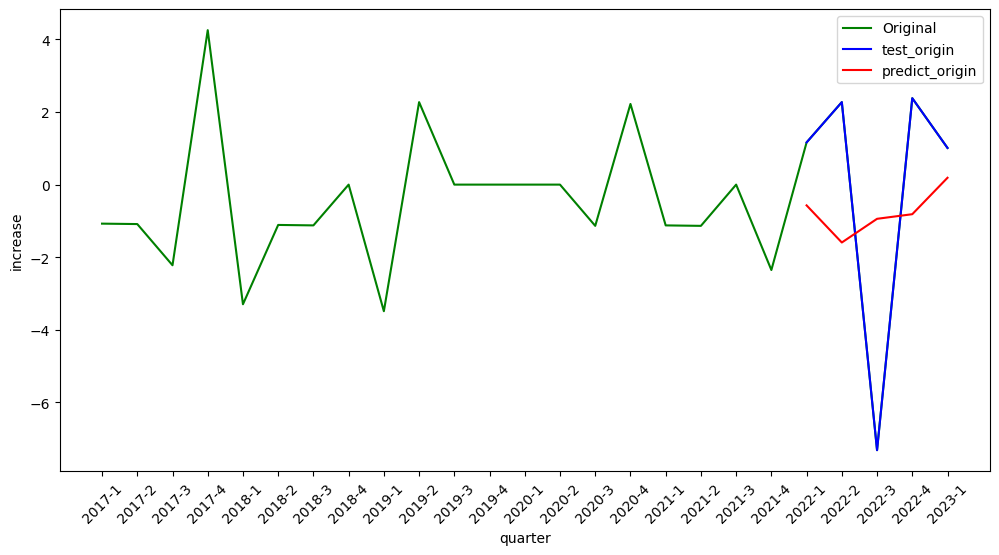

In [120]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [121]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.649173
std      4.104558
min     -6.374727
25%      0.821803
50%      1.735030
75%      3.196077
max      3.867681
dtype: float64

In [122]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 26ms/step
[[0.5194229]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.306107759475708 


### 추가


In [123]:
sin_hosp.loc[25] = ['2023-2', '일반의원', sales, growth, increase, marketability]

<ipython-input-123-15276c8a24d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hosp.loc[25] = ['2023-2', '일반의원', sales, growth, increase, marketability]


In [124]:
sin_hosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일반의원,1.037931e+10,1.000000,-1.075269,-1.031224e+07
1,2017-2,일반의원,9.630404e+09,0.927847,-1.086957,-1.527883e+07
2,2017-3,일반의원,9.492884e+09,0.985720,-2.222222,-2.028841e+07
3,2017-4,일반의원,8.887913e+09,0.936271,4.255319,-3.079050e+07
4,2018-1,일반의원,1.017201e+10,1.144477,-3.296703,-1.755805e+07
5,2018-2,일반의원,9.002825e+09,0.885059,-1.111111,-2.173273e+07
6,2018-3,일반의원,9.182735e+09,1.019984,-1.123596,-1.956954e+07
7,2018-4,일반의원,9.379632e+09,1.021442,0.000000,-4.945759e+07
8,2019-1,일반의원,1.210410e+10,1.290466,-3.488372,1.307672e+07
9,2019-2,일반의원,1.120982e+10,0.926117,2.272727,-3.816054e+06


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [125]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_hosp[['성장성', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.031224e+07 -1.075269
1   0.927847 -1.527883e+07 -1.086957
2   0.985720 -2.028841e+07 -2.222222
3   0.936271 -3.079050e+07  4.255319
4   1.144477 -1.755805e+07 -3.296703
5   0.885059 -2.173273e+07 -1.111111
6   1.019984 -1.956954e+07 -1.123596
7   1.021442 -4.945759e+07  0.000000
8   1.290466  1.307672e+07 -3.488372
9   0.926117 -3.816054e+06  2.272727
10  0.966351 -5.696994e+06  0.000000
11  1.109844 -3.456353e+07  0.000000
12  0.929616 -2.204874e+07  0.000000
13  1.071894 -1.871544e+07  0.000000
14  0.975502 -2.214081e+07 -1.136364
15  0.959043 -2.329059e+07  2.222222
16  0.996906 -1.256593e+07 -1.123596
17  1.099308 -1.348794e+07 -1.136364
18  0.994220 -9.582373e+06  0.000000
19  0.910509 -2.998029e+07 -2.352941
20  1.052020 -2.010944e+07  1.162791
21  0.960562 -2.713385e+07  2.272727
22  1.128104 -1.096890e+07 -7.317073
23  0.966153 -3.072108e+07  2.380952
24  0.991653 -1.862989e+07  1.010403
25  0.997815 -1.465899e+07 -1.306108
-

In [126]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [127]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.26293161 0.49297257 0.71959847]
 [0.27813168 0.55647212 0.51942289]]


In [128]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [129]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [130]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3234
Epoch 1: val_loss improved from inf to 0.59248, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.3234 - val_loss: 0.5925
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3119
Epoch 2: val_loss improved from 0.59248 to 0.57457, saving model to stock_model.h5
1/1 [==============================] - 0s 130ms/step - loss: 0.3119 - val_loss: 0.5746
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3009
Epoch 3: val_loss improved from 0.57457 to 0.55709, saving model to stock_model.h5
1/1 [==============================] - 0s 112ms/step - loss: 0.3009 - val_loss: 0.5571
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2902
Epoch 4: val_loss improved from 0.55709 to 0.53996, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.2902 - val_loss: 0.5400
Epoch 5/100
1/1 [===============

In [131]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 878ms/step
[[0.47877952]
 [0.60025877]
 [0.5227337 ]
 [0.46602154]
 [0.58033365]]


In [132]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.619951,0.478780
2022-3,1.000000,0.600259
2022-4,0.886722,0.522734
2023-1,0.433134,0.466022
2023-2,0.566595,0.580334


In [133]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.619951,0.478780,1.123585e+10,1.070119e+10,5.346568e+08
2022-3,1.000000,0.600259,1.267521e+10,1.116127e+10,1.513938e+09
2022-4,0.886722,0.522734,1.224619e+10,1.086766e+10,1.378532e+09
2023-1,0.433134,0.466022,1.052832e+10,1.065287e+10,-1.245532e+08
2023-2,0.566595,0.580334,1.103377e+10,1.108581e+10,-5.203354e+07


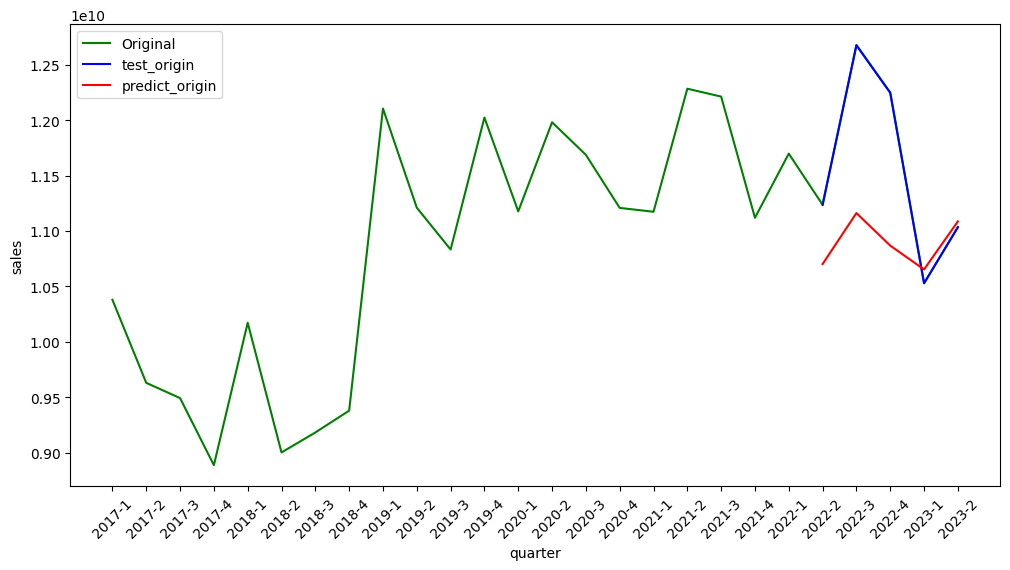

In [134]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [135]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     6.501080e+08
std      7.718866e+08
min     -1.245532e+08
25%     -5.203354e+07
50%      5.346568e+08
75%      1.378532e+09
max      1.513938e+09
dtype: float64

In [136]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 28ms/step
[[0.55938274]]
--------------------------------------------------------------------------------
예측된 매출  : 11006459904.0 


### 성장성

In [137]:
X = sin_hosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.037931e+10 -1.031224e+07 -1.075269
1   9.630404e+09 -1.527883e+07 -1.086957
2   9.492884e+09 -2.028841e+07 -2.222222
3   8.887913e+09 -3.079050e+07  4.255319
4   1.017201e+10 -1.755805e+07 -3.296703
5   9.002825e+09 -2.173273e+07 -1.111111
6   9.182735e+09 -1.956954e+07 -1.123596
7   9.379632e+09 -4.945759e+07  0.000000
8   1.210410e+10  1.307672e+07 -3.488372
9   1.120982e+10 -3.816054e+06  2.272727
10  1.083262e+10 -5.696994e+06  0.000000
11  1.202251e+10 -3.456353e+07  0.000000
12  1.117632e+10 -2.204874e+07  0.000000
13  1.197983e+10 -1.871544e+07  0.000000
14  1.168635e+10 -2.214081e+07 -1.136364
15  1.120770e+10 -2.329059e+07  2.222222
16  1.117302e+10 -1.256593e+07 -1.123596
17  1.228259e+10 -1.348794e+07 -1.136364
18  1.221160e+10 -9.582373e+06  0.000000
19  1.111877e+10 -2.998029e+07 -2.352941
20  1.169717e+10 -2.010944e+07  1.162791
21  1.123585e+10 -2.713385e+07  2.272727
22  1.267521e+10 -1.096890e+07 -7.317073
23  1.224619e+10

In [138]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [139]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.43313441 0.49297257 0.71959847]
 [0.56659476 0.55647212 0.51942289]]


In [140]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [141]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1878
Epoch 1: val_loss improved from inf to 0.13152, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1878 - val_loss: 0.1315
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1795
Epoch 2: val_loss improved from 0.13152 to 0.12301, saving model to stock_model.h5
1/1 [==============================] - 0s 140ms/step - loss: 0.1795 - val_loss: 0.1230
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1717
Epoch 3: val_loss improved from 0.12301 to 0.11494, saving model to stock_model.h5
1/1 [==============================] - 0s 124ms/step - loss: 0.1717 - val_loss: 0.1149
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1642
Epoch 4: val_loss improved from 0.11494 to 0.10728, saving model to stock_model.h5
1/1 [==============================] - 0s 146ms/step - loss: 0.1642 - val_loss: 0.1073
Epoch 5/100
1/1 [==============

In [143]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 888ms/step
[[0.28323662]
 [0.33066046]
 [0.2934078 ]
 [0.27414882]
 [0.33305657]]


In [144]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.186240,0.283237
2022-3,0.599509,0.330660
2022-4,0.200032,0.293408
2023-1,0.262932,0.274149
2023-2,0.278132,0.333057


In [145]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 3].values       # 성장성이 sin_hosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.186240,0.283237,0.960562,0.999885,-0.039323
2022-3,0.599509,0.330660,1.128104,1.019111,0.108993
2022-4,0.200032,0.293408,0.966153,1.004008,-0.037855
2023-1,0.262932,0.274149,0.991653,0.996201,-0.004548
2023-2,0.278132,0.333057,0.997815,1.020082,-0.022267


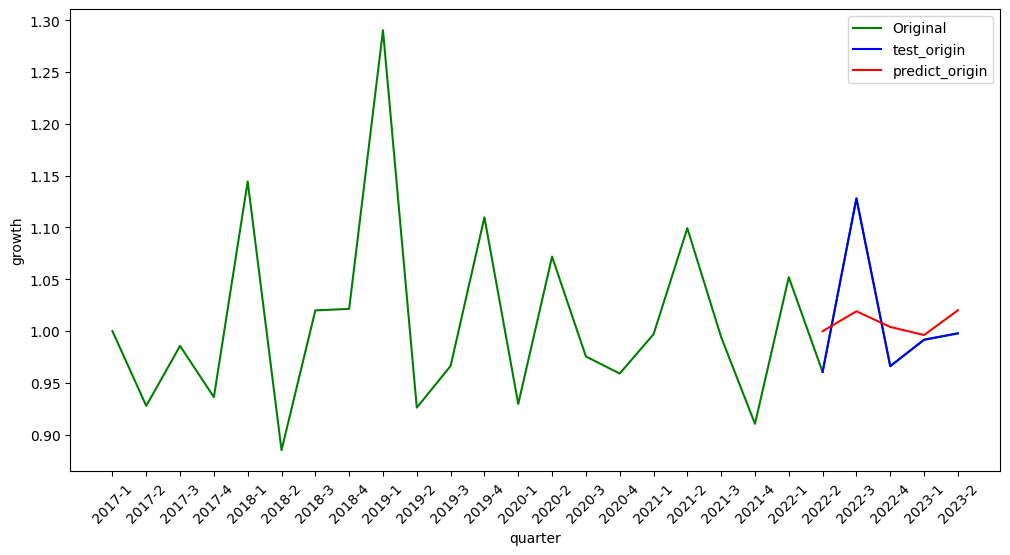

In [146]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [147]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.001000
std      0.061989
min     -0.039323
25%     -0.037855
50%     -0.022267
75%     -0.004548
max      0.108993
dtype: float64

In [148]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 26ms/step
[[0.29923213]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0063695907592773 


### 시장성

In [149]:
### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_hosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.037931e+10  1.000000 -1.075269
1   9.630404e+09  0.927847 -1.086957
2   9.492884e+09  0.985720 -2.222222
3   8.887913e+09  0.936271  4.255319
4   1.017201e+10  1.144477 -3.296703
5   9.002825e+09  0.885059 -1.111111
6   9.182735e+09  1.019984 -1.123596
7   9.379632e+09  1.021442  0.000000
8   1.210410e+10  1.290466 -3.488372
9   1.120982e+10  0.926117  2.272727
10  1.083262e+10  0.966351  0.000000
11  1.202251e+10  1.109844  0.000000
12  1.117632e+10  0.929616  0.000000
13  1.197983e+10  1.071894  0.000000
14  1.168635e+10  0.975502 -1.136364
15  1.120770e+10  0.959043  2.222222
16  1.117302e+10  0.996906 -1.123596
17  1.228259e+10  1.099308 -1.136364
18  1.221160e+10  0.994220  0.000000
19  1.111877e+10  0.910509 -2.352941
20  1.169717e+10  1.052020  1.162791
21  1.123585e+10  0.960562  2.272727
22  1.267521e+10  1.128104 -7.317073
23  1.224619e+10  0.966153  2.380952
24  1.052832e+10  0.991653  1.010403
25  1.103377e+10  0.997815 -1.306108
-

In [150]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [151]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.43313441 0.26293161 0.71959847]
 [0.56659476 0.27813168 0.51942289]]


In [152]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [153]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2992
Epoch 1: val_loss improved from inf to 0.29073, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2992 - val_loss: 0.2907
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2877
Epoch 2: val_loss improved from 0.29073 to 0.27785, saving model to stock_model.h5
1/1 [==============================] - 0s 126ms/step - loss: 0.2877 - val_loss: 0.2779
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2766
Epoch 3: val_loss improved from 0.27785 to 0.26536, saving model to stock_model.h5
1/1 [==============================] - 0s 141ms/step - loss: 0.2766 - val_loss: 0.2654
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2658
Epoch 4: val_loss improved from 0.26536 to 0.25322, saving model to stock_model.h5
1/1 [==============================] - 0s 124ms/step - loss: 0.2658 - val_loss: 0.2532
Epoch 5/100
1/1 [==============

In [155]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 887ms/step
[[0.45643148]
 [0.5528202 ]
 [0.49283785]
 [0.46523637]
 [0.5539285 ]]


In [156]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.356984,0.456431
2022-3,0.615481,0.552820
2022-4,0.299620,0.492838
2023-1,0.492973,0.465236
2023-2,0.556472,0.553928


In [157]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 5].values       # 시장성이 sin_hosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.356984,0.456431,-2.713385e+07,-20914964.0,-6.218890e+06
2022-3,0.615481,0.552820,-1.096890e+07,-14887361.0,3.918457e+06
2022-4,0.299620,0.492838,-3.072108e+07,-18638316.0,-1.208277e+07
2023-1,0.492973,0.465236,-1.862989e+07,-20364356.0,1.734464e+06
2023-2,0.556472,0.553928,-1.465899e+07,-14818055.0,1.590640e+05


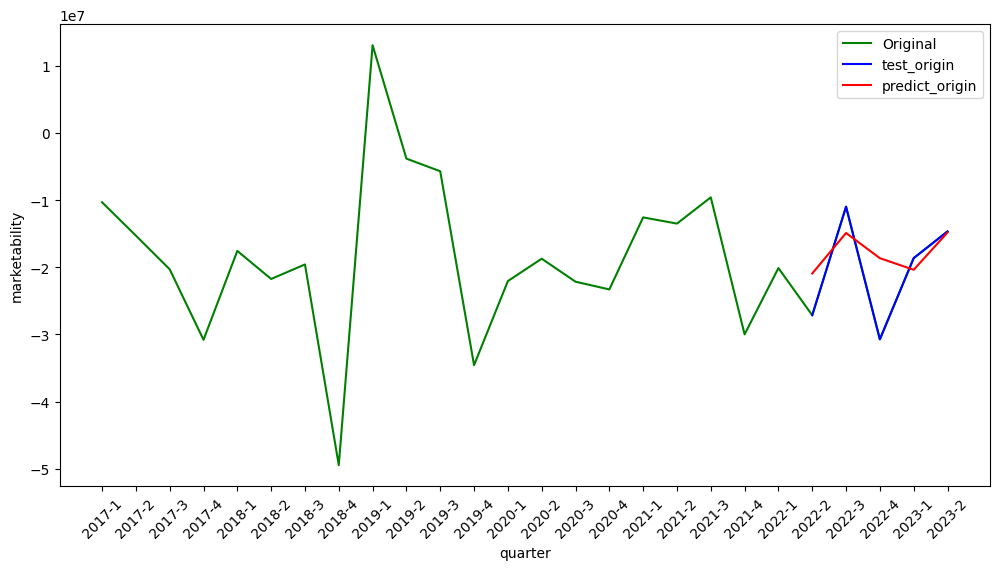

In [158]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [159]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -2.497935e+06
std      6.554721e+06
min     -1.208277e+07
25%     -6.218890e+06
50%      1.590640e+05
75%      1.734464e+06
max      3.918457e+06
dtype: float64

In [160]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 32ms/step
[[0.47653455]]
--------------------------------------------------------------------------------
예측된 시장성  : -19657832.0 


### 순점포증감률

In [161]:
### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '성장성', '시장성']]
y = sin_hosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.037931e+10  1.000000 -1.031224e+07
1   9.630404e+09  0.927847 -1.527883e+07
2   9.492884e+09  0.985720 -2.028841e+07
3   8.887913e+09  0.936271 -3.079050e+07
4   1.017201e+10  1.144477 -1.755805e+07
5   9.002825e+09  0.885059 -2.173273e+07
6   9.182735e+09  1.019984 -1.956954e+07
7   9.379632e+09  1.021442 -4.945759e+07
8   1.210410e+10  1.290466  1.307672e+07
9   1.120982e+10  0.926117 -3.816054e+06
10  1.083262e+10  0.966351 -5.696994e+06
11  1.202251e+10  1.109844 -3.456353e+07
12  1.117632e+10  0.929616 -2.204874e+07
13  1.197983e+10  1.071894 -1.871544e+07
14  1.168635e+10  0.975502 -2.214081e+07
15  1.120770e+10  0.959043 -2.329059e+07
16  1.117302e+10  0.996906 -1.256593e+07
17  1.228259e+10  1.099308 -1.348794e+07
18  1.221160e+10  0.994220 -9.582373e+06
19  1.111877e+10  0.910509 -2.998029e+07
20  1.169717e+10  1.052020 -2.010944e+07
21  1.123585e+10  0.960562 -2.713385e+07
22  1.267521e+10  1.128104 -1.096890e+07
23  1.224619e+10

In [162]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [163]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.43313441 0.26293161 0.49297257]
 [0.56659476 0.27813168 0.55647212]]


In [164]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [165]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4296
Epoch 1: val_loss improved from inf to 0.34945, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4296 - val_loss: 0.3495
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4158
Epoch 2: val_loss improved from 0.34945 to 0.33565, saving model to stock_model.h5
1/1 [==============================] - 0s 168ms/step - loss: 0.4158 - val_loss: 0.3357
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4024
Epoch 3: val_loss improved from 0.33565 to 0.32224, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.4024 - val_loss: 0.3222
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3892
Epoch 4: val_loss improved from 0.32224 to 0.30916, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.3892 - val_loss: 0.3092
Epoch 5/100
1/1 [==============

In [167]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 801ms/step
[[0.47763047]
 [0.53109914]
 [0.5429543 ]
 [0.62868553]
 [0.50358224]]


In [168]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.828679,0.477630
2022-3,0.000000,0.531099
2022-4,0.838031,0.542954
2023-1,0.719598,0.628686
2023-2,0.519423,0.503582


In [169]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.828679,0.477630,2.272727,-1.789746,4.062473
2022-3,0.000000,0.531099,-7.317073,-1.170986,-6.146088
2022-4,0.838031,0.542954,2.380952,-1.033793,3.414745
2023-1,0.719598,0.628686,1.010403,-0.041678,1.052080
2023-2,0.519423,0.503582,-1.306108,-1.489422,0.183314


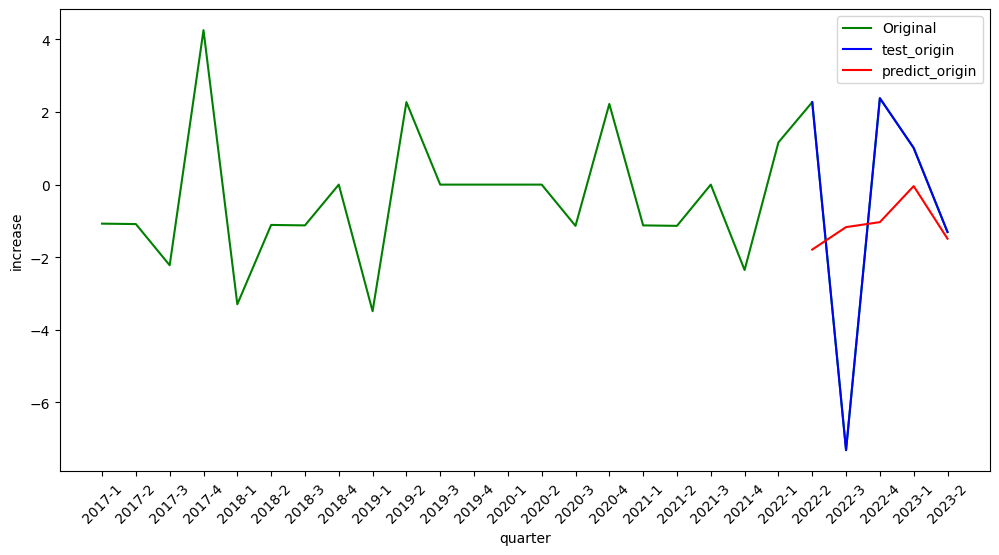

In [170]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [171]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.513305
std      4.054677
min     -6.146088
25%      0.183314
50%      1.052080
75%      3.414745
max      4.062473
dtype: float64

In [172]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 26ms/step
[[0.49953303]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.5362809896469116 


### 추가

In [173]:
sin_hosp.loc[26] = ['2023-3', '일반의원', sales, growth, increase, marketability]

<ipython-input-173-40084202e59f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hosp.loc[26] = ['2023-3', '일반의원', sales, growth, increase, marketability]


In [174]:
sin_hosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일반의원,1.037931e+10,1.000000,-1.075269,-1.031224e+07
1,2017-2,일반의원,9.630404e+09,0.927847,-1.086957,-1.527883e+07
2,2017-3,일반의원,9.492884e+09,0.985720,-2.222222,-2.028841e+07
3,2017-4,일반의원,8.887913e+09,0.936271,4.255319,-3.079050e+07
4,2018-1,일반의원,1.017201e+10,1.144477,-3.296703,-1.755805e+07
5,2018-2,일반의원,9.002825e+09,0.885059,-1.111111,-2.173273e+07
6,2018-3,일반의원,9.182735e+09,1.019984,-1.123596,-1.956954e+07
7,2018-4,일반의원,9.379632e+09,1.021442,0.000000,-4.945759e+07
8,2019-1,일반의원,1.210410e+10,1.290466,-3.488372,1.307672e+07
9,2019-2,일반의원,1.120982e+10,0.926117,2.272727,-3.816054e+06


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [175]:
### X / y 데이터 생성
X = sin_hosp[['성장성', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.031224e+07 -1.075269
1   0.927847 -1.527883e+07 -1.086957
2   0.985720 -2.028841e+07 -2.222222
3   0.936271 -3.079050e+07  4.255319
4   1.144477 -1.755805e+07 -3.296703
5   0.885059 -2.173273e+07 -1.111111
6   1.019984 -1.956954e+07 -1.123596
7   1.021442 -4.945759e+07  0.000000
8   1.290466  1.307672e+07 -3.488372
9   0.926117 -3.816054e+06  2.272727
10  0.966351 -5.696994e+06  0.000000
11  1.109844 -3.456353e+07  0.000000
12  0.929616 -2.204874e+07  0.000000
13  1.071894 -1.871544e+07  0.000000
14  0.975502 -2.214081e+07 -1.136364
15  0.959043 -2.329059e+07  2.222222
16  0.996906 -1.256593e+07 -1.123596
17  1.099308 -1.348794e+07 -1.136364
18  0.994220 -9.582373e+06  0.000000
19  0.910509 -2.998029e+07 -2.352941
20  1.052020 -2.010944e+07  1.162791
21  0.960562 -2.713385e+07  2.272727
22  1.128104 -1.096890e+07 -7.317073
23  0.966153 -3.072108e+07  2.380952
24  0.991653 -1.862989e+07  1.010403
25  0.997815 -1.465899e+07 -1.306108
2

In [176]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [177]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.27813168 0.55647212 0.51942289]
 [0.29923211 0.47653456 0.49953303]]


In [178]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [179]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3281
Epoch 1: val_loss improved from inf to 0.59611, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.3281 - val_loss: 0.5961
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3165
Epoch 2: val_loss improved from 0.59611 to 0.57834, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.3165 - val_loss: 0.5783
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3052
Epoch 3: val_loss improved from 0.57834 to 0.56098, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.3052 - val_loss: 0.5610
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2943
Epoch 4: val_loss improved from 0.56098 to 0.54397, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.2943 - val_loss: 0.5440
Epoch 5/100
1/1 [===============

In [181]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 840ms/step
[[0.6140257 ]
 [0.5343561 ]
 [0.47546673]
 [0.59393626]
 [0.5721898 ]]


In [182]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,1.000000,0.614026
2022-4,0.886722,0.534356
2023-1,0.433134,0.475467
2023-2,0.566595,0.593936
2023-3,0.559383,0.572190


In [183]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,1.000000,0.614026,1.267521e+10,1.121341e+10,1.461798e+09
2022-4,0.886722,0.534356,1.224619e+10,1.091168e+10,1.334515e+09
2023-1,0.433134,0.475467,1.052832e+10,1.068865e+10,-1.603246e+08
2023-2,0.566595,0.593936,1.103377e+10,1.113732e+10,-1.035500e+08
2023-3,0.559383,0.572190,1.100646e+10,1.105496e+10,-4.850381e+07


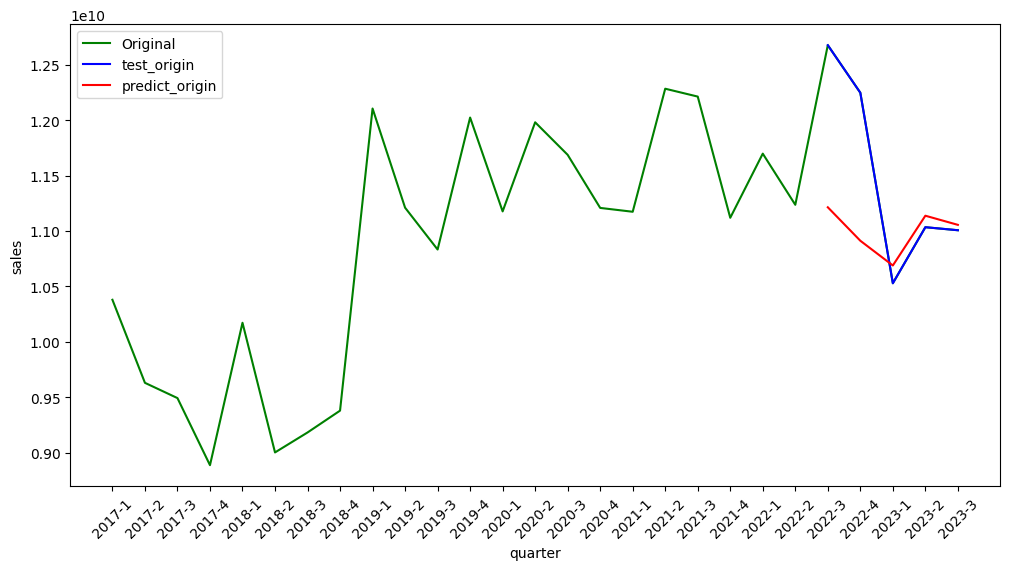

In [184]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [185]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     4.967868e+08
std      8.250115e+08
min     -1.603246e+08
25%     -1.035500e+08
50%     -4.850381e+07
75%      1.334515e+09
max      1.461798e+09
dtype: float64

In [186]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 28ms/step
[[0.5272567]]
--------------------------------------------------------------------------------
예측된 매출  : 10884789248.0 


### 성장성

In [187]:
X = sin_hosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.037931e+10 -1.031224e+07 -1.075269
1   9.630404e+09 -1.527883e+07 -1.086957
2   9.492884e+09 -2.028841e+07 -2.222222
3   8.887913e+09 -3.079050e+07  4.255319
4   1.017201e+10 -1.755805e+07 -3.296703
5   9.002825e+09 -2.173273e+07 -1.111111
6   9.182735e+09 -1.956954e+07 -1.123596
7   9.379632e+09 -4.945759e+07  0.000000
8   1.210410e+10  1.307672e+07 -3.488372
9   1.120982e+10 -3.816054e+06  2.272727
10  1.083262e+10 -5.696994e+06  0.000000
11  1.202251e+10 -3.456353e+07  0.000000
12  1.117632e+10 -2.204874e+07  0.000000
13  1.197983e+10 -1.871544e+07  0.000000
14  1.168635e+10 -2.214081e+07 -1.136364
15  1.120770e+10 -2.329059e+07  2.222222
16  1.117302e+10 -1.256593e+07 -1.123596
17  1.228259e+10 -1.348794e+07 -1.136364
18  1.221160e+10 -9.582373e+06  0.000000
19  1.111877e+10 -2.998029e+07 -2.352941
20  1.169717e+10 -2.010944e+07  1.162791
21  1.123585e+10 -2.713385e+07  2.272727
22  1.267521e+10 -1.096890e+07 -7.317073
23  1.224619e+10

In [188]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [189]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.56659476 0.55647212 0.51942289]
 [0.55938271 0.47653456 0.49953303]]


In [190]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [191]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1814
Epoch 1: val_loss improved from inf to 0.12254, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.1814 - val_loss: 0.1225
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1732
Epoch 2: val_loss improved from 0.12254 to 0.11457, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.1732 - val_loss: 0.1146
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1654
Epoch 3: val_loss improved from 0.11457 to 0.10704, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.1654 - val_loss: 0.1070
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1579
Epoch 4: val_loss improved from 0.10704 to 0.09990, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.1579 - val_loss: 0.0999
Epoch 5/100
1/1 [================

In [193]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 818ms/step
[[0.31092495]
 [0.27607003]
 [0.25901422]
 [0.31330752]
 [0.28078538]]


In [194]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.599509,0.310925
2022-4,0.200032,0.276070
2023-1,0.262932,0.259014
2023-2,0.278132,0.313308
2023-3,0.299232,0.280785


In [195]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 3].values       # 성장성이 sin_hosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.599509,0.310925,1.128104,1.011110,0.116994
2022-4,0.200032,0.276070,0.966153,0.996980,-0.030826
2023-1,0.262932,0.259014,0.991653,0.990065,0.001588
2023-2,0.278132,0.313308,0.997815,1.012076,-0.014261
2023-3,0.299232,0.280785,1.006370,0.998891,0.007478


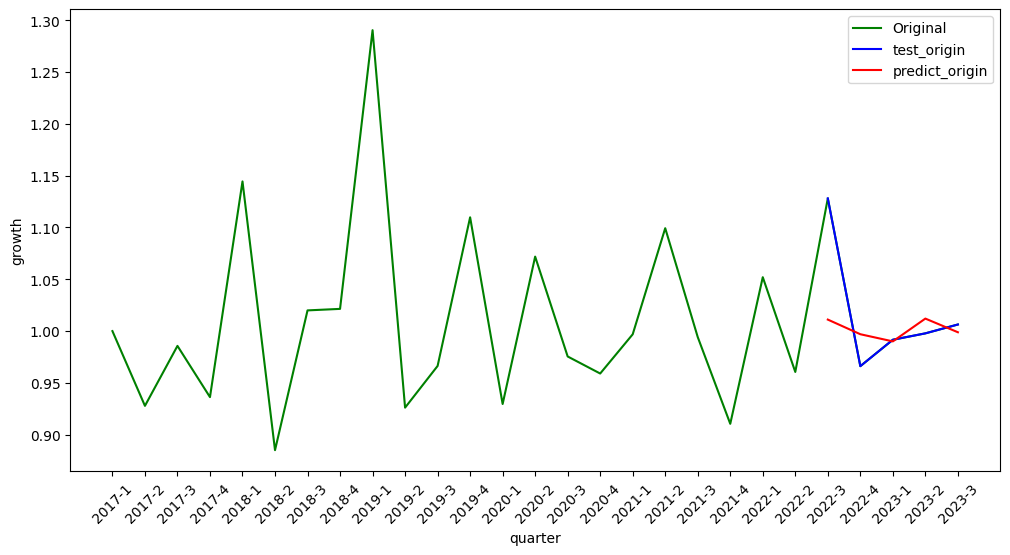

In [196]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [197]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.016195
std      0.058285
min     -0.030826
25%     -0.014261
50%      0.001588
75%      0.007478
max      0.116994
dtype: float64

In [198]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 28ms/step
[[0.26608008]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9929295182228088 


###시장성

In [199]:
### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_hosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.037931e+10  1.000000 -1.075269
1   9.630404e+09  0.927847 -1.086957
2   9.492884e+09  0.985720 -2.222222
3   8.887913e+09  0.936271  4.255319
4   1.017201e+10  1.144477 -3.296703
5   9.002825e+09  0.885059 -1.111111
6   9.182735e+09  1.019984 -1.123596
7   9.379632e+09  1.021442  0.000000
8   1.210410e+10  1.290466 -3.488372
9   1.120982e+10  0.926117  2.272727
10  1.083262e+10  0.966351  0.000000
11  1.202251e+10  1.109844  0.000000
12  1.117632e+10  0.929616  0.000000
13  1.197983e+10  1.071894  0.000000
14  1.168635e+10  0.975502 -1.136364
15  1.120770e+10  0.959043  2.222222
16  1.117302e+10  0.996906 -1.123596
17  1.228259e+10  1.099308 -1.136364
18  1.221160e+10  0.994220  0.000000
19  1.111877e+10  0.910509 -2.352941
20  1.169717e+10  1.052020  1.162791
21  1.123585e+10  0.960562  2.272727
22  1.267521e+10  1.128104 -7.317073
23  1.224619e+10  0.966153  2.380952
24  1.052832e+10  0.991653  1.010403
25  1.103377e+10  0.997815 -1.306108
2

In [200]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [201]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.56659476 0.27813168 0.51942289]
 [0.55938271 0.29923211 0.49953303]]


In [202]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [203]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [204]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3040
Epoch 1: val_loss improved from inf to 0.24589, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.3040 - val_loss: 0.2459
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2923
Epoch 2: val_loss improved from 0.24589 to 0.23426, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2923 - val_loss: 0.2343
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2810
Epoch 3: val_loss improved from 0.23426 to 0.22299, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2810 - val_loss: 0.2230
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2700
Epoch 4: val_loss improved from 0.22299 to 0.21205, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.2700 - val_loss: 0.2121
Epoch 5/100
1/1 [================

In [205]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 831ms/step
[[0.53044844]
 [0.47338197]
 [0.44798392]
 [0.53246176]
 [0.4570381 ]]


In [206]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.615481,0.530448
2022-4,0.299620,0.473382
2023-1,0.492973,0.447984
2023-2,0.556472,0.532462
2023-3,0.476535,0.457038


In [207]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 5].values       # 시장성이 sin_hosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.615481,0.530448,-1.096890e+07,-16286364.0,5.317460e+06
2022-4,0.299620,0.473382,-3.072108e+07,-19854976.0,-1.086611e+07
2023-1,0.492973,0.447984,-1.862989e+07,-21443226.0,2.813334e+06
2023-2,0.556472,0.532462,-1.465899e+07,-16160462.0,1.501471e+06
2023-3,0.476535,0.457038,-1.965783e+07,-20877030.0,1.219198e+06


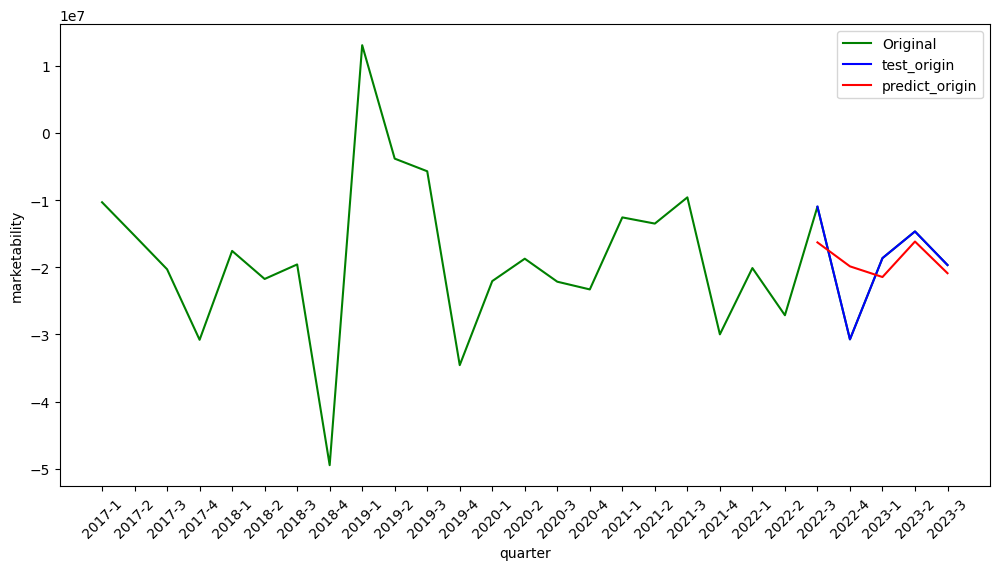

In [208]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [209]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -2.929063e+03
std      6.284969e+06
min     -1.086611e+07
25%      1.219198e+06
50%      1.501471e+06
75%      2.813334e+06
max      5.317460e+06
dtype: float64

In [210]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.4330786]]
--------------------------------------------------------------------------------
예측된 시장성  : -22375322.0 


### 순점포증감률

In [211]:
### X / y 데이터 생성
X = sin_hosp[['분기당_매출_금액', '성장성', '시장성']]
y = sin_hosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.037931e+10  1.000000 -1.031224e+07
1   9.630404e+09  0.927847 -1.527883e+07
2   9.492884e+09  0.985720 -2.028841e+07
3   8.887913e+09  0.936271 -3.079050e+07
4   1.017201e+10  1.144477 -1.755805e+07
5   9.002825e+09  0.885059 -2.173273e+07
6   9.182735e+09  1.019984 -1.956954e+07
7   9.379632e+09  1.021442 -4.945759e+07
8   1.210410e+10  1.290466  1.307672e+07
9   1.120982e+10  0.926117 -3.816054e+06
10  1.083262e+10  0.966351 -5.696994e+06
11  1.202251e+10  1.109844 -3.456353e+07
12  1.117632e+10  0.929616 -2.204874e+07
13  1.197983e+10  1.071894 -1.871544e+07
14  1.168635e+10  0.975502 -2.214081e+07
15  1.120770e+10  0.959043 -2.329059e+07
16  1.117302e+10  0.996906 -1.256593e+07
17  1.228259e+10  1.099308 -1.348794e+07
18  1.221160e+10  0.994220 -9.582373e+06
19  1.111877e+10  0.910509 -2.998029e+07
20  1.169717e+10  1.052020 -2.010944e+07
21  1.123585e+10  0.960562 -2.713385e+07
22  1.267521e+10  1.128104 -1.096890e+07
23  1.224619e+10

In [212]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [213]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.56659476 0.27813168 0.55647212]
 [0.55938271 0.29923211 0.47653456]]


In [214]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [215]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [216]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4214
Epoch 1: val_loss improved from inf to 0.43015, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4214 - val_loss: 0.4301
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4077
Epoch 2: val_loss improved from 0.43015 to 0.41522, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.4077 - val_loss: 0.4152
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3943
Epoch 3: val_loss improved from 0.41522 to 0.40066, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.3943 - val_loss: 0.4007
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3813
Epoch 4: val_loss improved from 0.40066 to 0.38643, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.3813 - val_loss: 0.3864
Epoch 5/100
1/1 [=================

In [217]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.5975109 ]
 [0.60978675]
 [0.71105146]
 [0.56618285]
 [0.5589346 ]]


In [218]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.000000,0.597511
2022-4,0.838031,0.609787
2023-1,0.719598,0.711051
2023-2,0.519423,0.566183
2023-3,0.499533,0.558935


In [219]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.000000,0.597511,-7.317073,-0.402443,-6.914630
2022-4,0.838031,0.609787,2.380952,-0.260382,2.641334
2023-1,0.719598,0.711051,1.010403,0.911493,0.098909
2023-2,0.519423,0.566183,-1.306108,-0.764983,-0.541125
2023-3,0.499533,0.558935,-1.536281,-0.848862,-0.687419


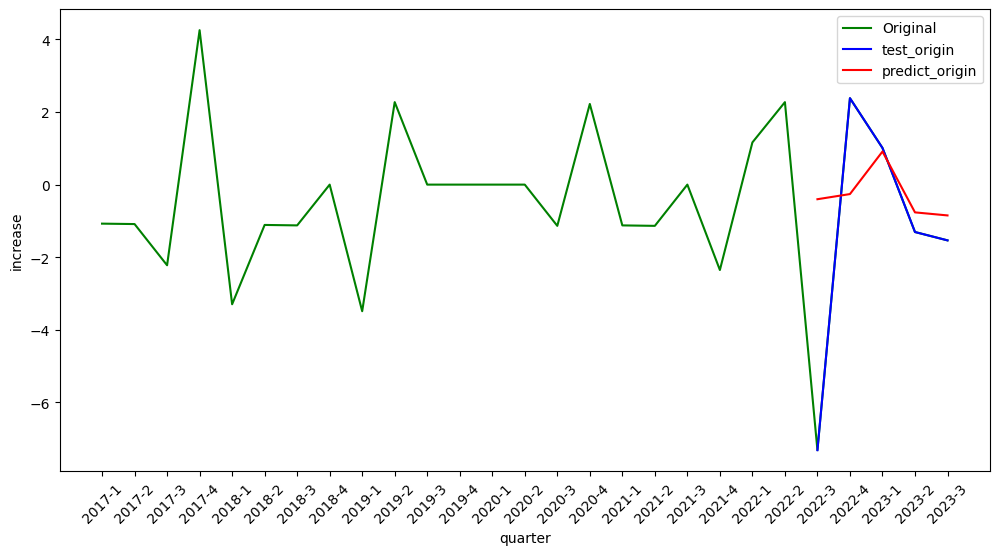

In [220]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [221]:
### error의 요약 통계량
error.describe()

count    5.000000
mean    -1.080586
std      3.525818
min     -6.914630
25%     -0.687419
50%     -0.541125
75%      0.098909
max      2.641334
dtype: float64

In [222]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 36ms/step
[[0.58905816]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.5002610087394714 


### 추가

In [223]:
sin_hosp.loc[27] = ['2023-4', '일반의원', sales, growth, increase, marketability]

<ipython-input-223-9f8010253cb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hosp.loc[27] = ['2023-4', '일반의원', sales, growth, increase, marketability]


In [224]:
final_sin_hosp = sin_hosp
final_sin_hosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,일반의원,1.037931e+10,1.000000,-1.075269,-1.031224e+07
1,2017-2,일반의원,9.630404e+09,0.927847,-1.086957,-1.527883e+07
2,2017-3,일반의원,9.492884e+09,0.985720,-2.222222,-2.028841e+07
3,2017-4,일반의원,8.887913e+09,0.936271,4.255319,-3.079050e+07
4,2018-1,일반의원,1.017201e+10,1.144477,-3.296703,-1.755805e+07
5,2018-2,일반의원,9.002825e+09,0.885059,-1.111111,-2.173273e+07
6,2018-3,일반의원,9.182735e+09,1.019984,-1.123596,-1.956954e+07
7,2018-4,일반의원,9.379632e+09,1.021442,0.000000,-4.945759e+07
8,2019-1,일반의원,1.210410e+10,1.290466,-3.488372,1.307672e+07
9,2019-2,일반의원,1.120982e+10,0.926117,2.272727,-3.816054e+06


## 최종결과

In [225]:
### X / y 데이터 생성
X = sin_hosp[['성장성', '시장성', '순점포증감률']]
y = sin_hosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.031224e+07 -1.075269
1   0.927847 -1.527883e+07 -1.086957
2   0.985720 -2.028841e+07 -2.222222
3   0.936271 -3.079050e+07  4.255319
4   1.144477 -1.755805e+07 -3.296703
5   0.885059 -2.173273e+07 -1.111111
6   1.019984 -1.956954e+07 -1.123596
7   1.021442 -4.945759e+07  0.000000
8   1.290466  1.307672e+07 -3.488372
9   0.926117 -3.816054e+06  2.272727
10  0.966351 -5.696994e+06  0.000000
11  1.109844 -3.456353e+07  0.000000
12  0.929616 -2.204874e+07  0.000000
13  1.071894 -1.871544e+07  0.000000
14  0.975502 -2.214081e+07 -1.136364
15  0.959043 -2.329059e+07  2.222222
16  0.996906 -1.256593e+07 -1.123596
17  1.099308 -1.348794e+07 -1.136364
18  0.994220 -9.582373e+06  0.000000
19  0.910509 -2.998029e+07 -2.352941
20  1.052020 -2.010944e+07  1.162791
21  0.960562 -2.713385e+07  2.272727
22  1.128104 -1.096890e+07 -7.317073
23  0.966153 -3.072108e+07  2.380952
24  0.991653 -1.862989e+07  1.010403
25  0.997815 -1.465899e+07 -1.306108
2

In [226]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [227]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.29923211 0.47653456 0.49953303]
 [0.26608013 0.43307858 0.58905816]]


In [228]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [229]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [230]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3281
Epoch 1: val_loss improved from inf to 0.66803, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.3281 - val_loss: 0.6680
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3165
Epoch 2: val_loss improved from 0.66803 to 0.64897, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.3165 - val_loss: 0.6490
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3052
Epoch 3: val_loss improved from 0.64897 to 0.63034, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.3052 - val_loss: 0.6303
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2943
Epoch 4: val_loss improved from 0.63034 to 0.61205, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.2943 - val_loss: 0.6120
Epoch 5/100
1/1 [=================

In [231]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 837ms/step
[[0.5343561 ]
 [0.47546673]
 [0.59393626]
 [0.5721898 ]
 [0.5272566 ]]


In [232]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hosp.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.886722,0.534356
2023-1,0.433134,0.475467
2023-2,0.566595,0.593936
2023-3,0.559383,0.572190
2023-4,0.527257,0.527257


In [233]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.886722,0.534356,1.224619e+10,1.091168e+10,1.334515e+09
2023-1,0.433134,0.475467,1.052832e+10,1.068865e+10,-1.603246e+08
2023-2,0.566595,0.593936,1.103377e+10,1.113732e+10,-1.035500e+08
2023-3,0.559383,0.572190,1.100646e+10,1.105496e+10,-4.850381e+07
2023-4,0.527257,0.527257,1.088479e+10,1.088479e+10,0.000000e+00


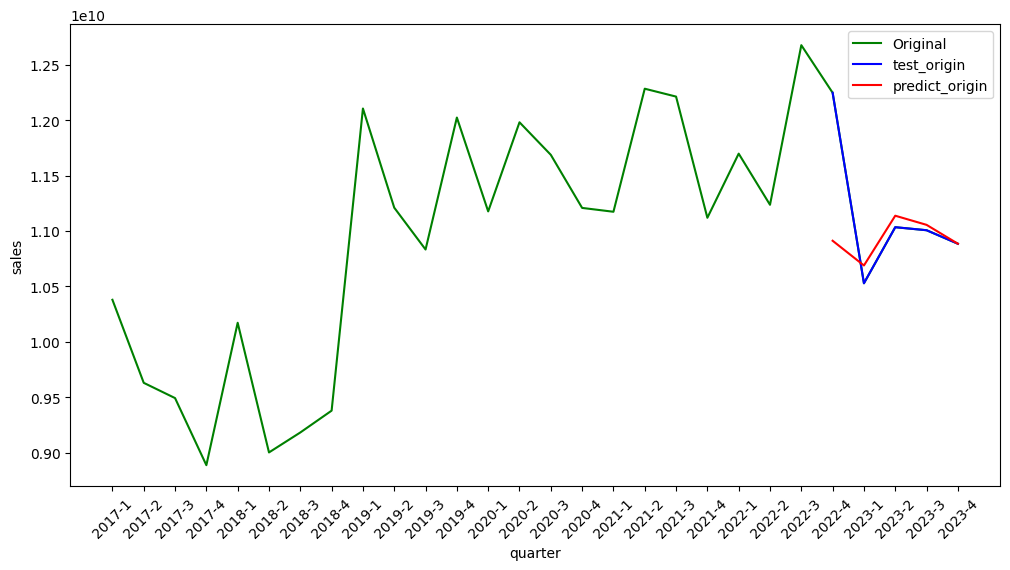

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hosp['분기'], sin_hosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()